<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/image_classification_model(ResNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#CIFAR-10 dataset
(img_train, label_train), (img_test, label_test) = keras.datasets.cifar10.load_data()

# Normalize (0 and 1)
img_train, img_test = img_train / 255.0, img_test / 255.0

In [35]:
#(one-hot encode)
num_classes = 10
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

# Define a data augmentation layer
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

In [29]:
# Define the improved CNN model
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    data_augmentation,  # Apply augmentation only to training data
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),  # Prevent overfitting
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(img_train, label_train,
                    validation_data=(img_test, label_test),
                    epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(img_test, label_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.3082 - loss: 1.8666 - val_accuracy: 0.5258 - val_loss: 1.3584
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5158 - loss: 1.3552 - val_accuracy: 0.5991 - val_loss: 1.1274
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5789 - loss: 1.1972 - val_accuracy: 0.6422 - val_loss: 1.0169
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6136 - loss: 1.1026 - val_accuracy: 0.6757 - val_loss: 0.9468
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6377 - loss: 1.0252 - val_accuracy: 0.6885 - val_loss: 0.9111
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6537 - loss: 0.9836 - val_accuracy: 0.7024 - val_loss: 0.8487
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6667 - loss: 0.9440 - val_accuracy: 0.6921 - val_loss: 0.8982
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6805 - loss: 0.9169 - val

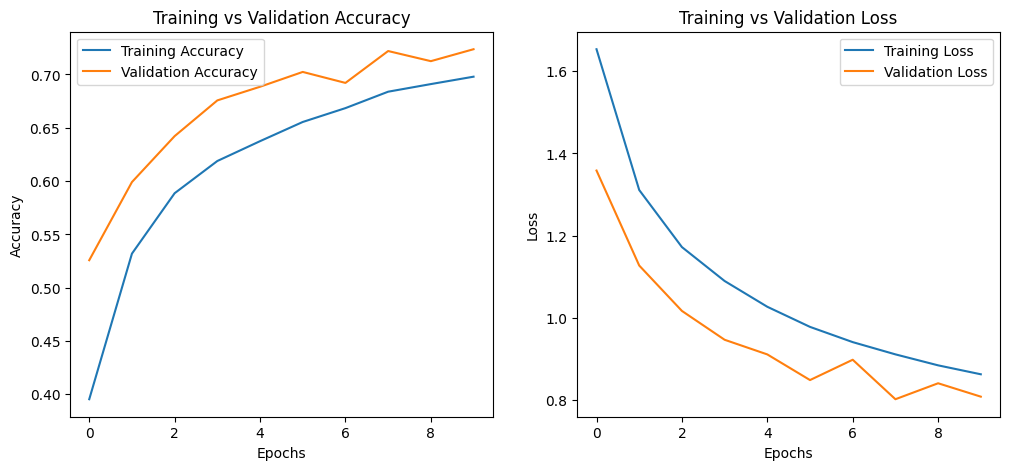

In [31]:
# Plot training accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


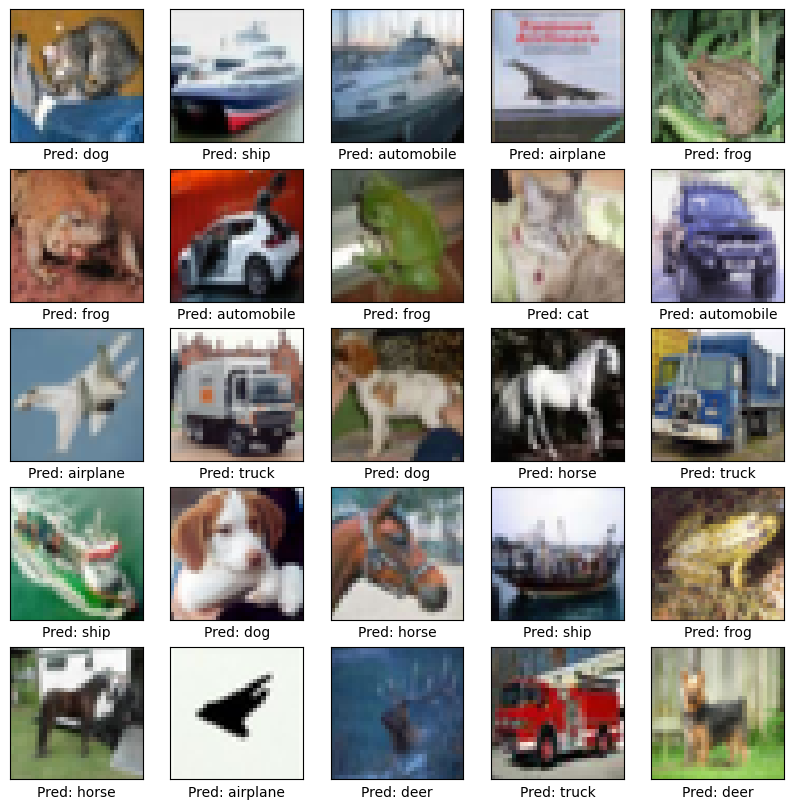

In [32]:
# Visualize some predictions
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predictions = model.predict(img_test[:25])

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_test[i])
    plt.xlabel(f"Pred: {class_names[np.argmax(predictions[i])]}")
plt.show()

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.3427 - loss: 2.1399 - val_accuracy: 0.4890 - val_loss: 1.4848 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5499 - loss: 1.2614 - val_accuracy: 0.5937 - val_loss: 1.1736 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6235 - loss: 1.0699 - val_accuracy: 0.6777 - val_loss: 0.9273 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6667 - loss: 0.9515 - val_accuracy: 0.6780 - val_loss: 0.9333 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.6867 - loss: 0.8989 - val_accuracy: 0.7279 - val_loss: 0.7861 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.7145 - loss: 0.8240 - val_accuracy: 0.7718 - val_loss: 0.6727 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7278 - l

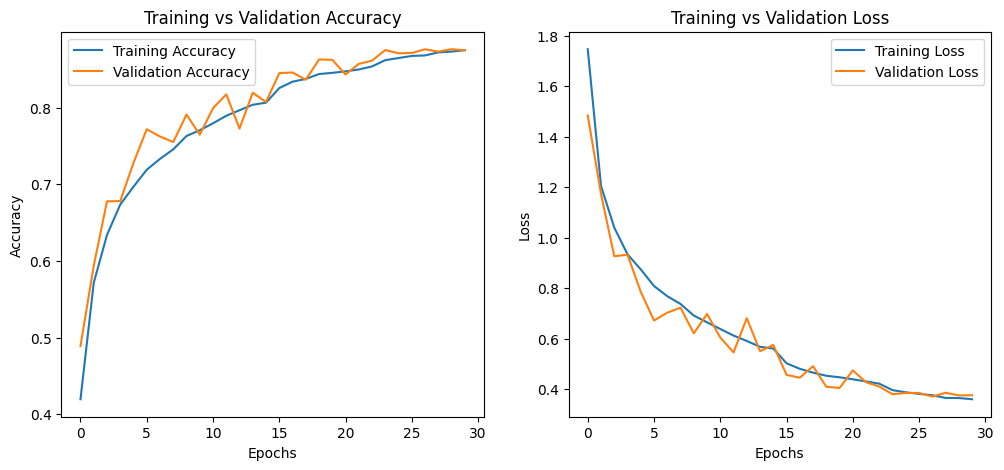

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
])

# Model Architecture
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Optimizer & Learning Rate Scheduler
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Compile Model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=30, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=[lr_scheduler])

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Accuracy & Loss Curves
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.show()

plot_history(history)

Increased Data Augmentation (More Robustness)

    data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),  # Increased from 0.1 to 0.2
    layers.RandomContrast(0.2),  # Increased from 0.1 to 0.2
    layers.RandomZoom(0.1),  # Added slight zoom for variation
    ])


Added One More Conv Layer (More Feature Extraction)


    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))  # New deeper layer
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

Optimized Learning Rate Scheduling

    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  # Changed from 'val_loss' to 'val_accuracy' for better generalization
    factor=0.3,  # Reduced LR more aggressively from 0.5 to 0.3
    patience=2,  # Faster adaptation (previously 3)
    )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


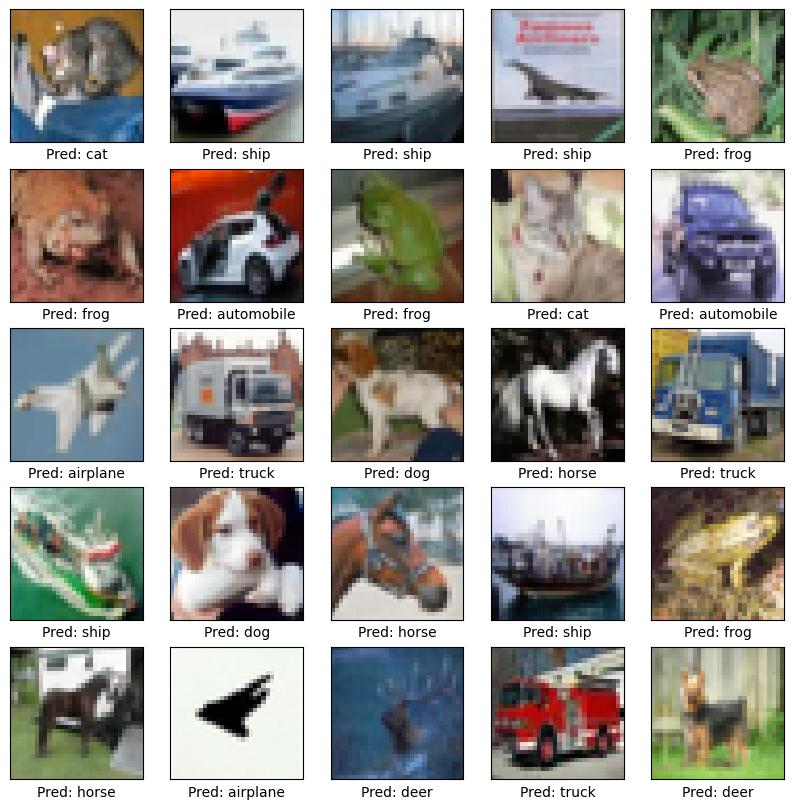

In [38]:
# Visualize some predictions
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predictions = model.predict(img_test[:25])

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_test[i])
    plt.xlabel(f"Pred: {class_names[np.argmax(predictions[i])]}")
plt.show()